In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline

import os

## Read Dataset

In [115]:
df = pd.read_csv('Saved Tracks.csv')

In [116]:
df['Artist'] = df['artists'].str.split(',').str[0]

In [117]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('analysis_url', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('track_href', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)
df.drop('artists', axis=1, inplace=True)
df.drop('duration_ms', axis=1, inplace=True)
df.drop('time_signature', axis=1, inplace=True)
df.drop('Popularity', axis=1, inplace=True)

In [180]:
df

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,uri,valence,added_at,song_title,popularity,Artist
added_at,,,,,,,,,,,,,,,,
2019-07-26 03:04:46+00:00,0.030500,0.625,0.836,0.000000,8,0.0867,-2.884,0,0.2240,105.023,spotify:track:5kldIyD365H9iq8Cz1Jb5F,0.6750,2019-07-26 03:04:46+00:00,My Best Life (feat. Mike Waters),62,KSHMR
2019-07-25 21:30:52+00:00,0.262000,0.725,0.680,0.000418,0,0.1110,-7.724,0,0.1440,114.101,spotify:track:2zzwSQ5xhBsZ5FoYv4IS82,0.4540,2019-07-25 21:30:52+00:00,Recognize (feat. Majid Jordan),0,DJ Snake
2019-07-25 18:51:50+00:00,0.030000,0.585,0.949,0.780000,5,0.1090,-1.956,0,0.0398,159.941,spotify:track:0pSL76Z9uhRAfFd09VmF24,0.5920,2019-07-25 18:51:50+00:00,When The Lights Go Down,0,DJ Snake
2019-07-24 17:00:15+00:00,0.120000,0.294,0.505,0.000000,3,0.0977,-8.106,1,0.0420,85.332,spotify:track:6wo37KVqFJhtuxPTpLCcfe,0.3570,2019-07-24 17:00:15+00:00,Takeaway (with ILLENIUM & Lennon Stella),0,The Chainsmokers
2019-07-22 23:40:58+00:00,0.066600,0.635,0.945,0.071200,2,0.0563,-3.678,0,0.0722,125.957,spotify:track:2tG3ozpawkCEAYDDuvMEFh,0.1630,2019-07-22 23:40:58+00:00,Show Me,30,Jasted
2019-07-21 18:22:41+00:00,0.463000,0.764,0.725,0.000006,7,0.1090,-8.812,1,0.0576,100.063,spotify:track:5F2AuFzEiuAQD0JVNjVJQz,0.0794,2019-07-21 18:22:41+00:00,Let Go,66,Beau Young Prince
2019-07-21 06:51:28+00:00,0.000281,0.471,0.921,0.001830,2,0.6360,-5.109,1,0.0816,132.074,spotify:track:1sJtUQHhEypas3n0xyIBfx,0.1510,2019-07-21 06:51:28+00:00,The Prophecy - KAAZE Remode,38,Timmy Trumpet
2019-07-21 05:49:56+00:00,0.079400,0.675,0.931,0.000023,1,0.1100,-3.432,0,0.0742,124.008,spotify:track:1z1Hg7Vb0AhHDiEmnDE79l,0.6130,2019-07-21 05:49:56+00:00,All the Time - Don Diablo Remix,63,Zara Larsson
2019-07-21 05:49:14+00:00,0.166000,0.673,0.596,0.000000,10,0.1100,-7.891,1,0.0354,123.969,spotify:track:3Kuu5vASpXK8oRsxOvau6P,0.1900,2019-07-21 05:49:14+00:00,Think About You,73,Kygo


<font color='Blue'>This is the first day I used Spotify to add songs! 😊</font>

In [48]:
df['added_at'].min()

'2018-04-06T15:56:10Z'

## Analyze the library

<font size="3">Get my top artists in the library</font>

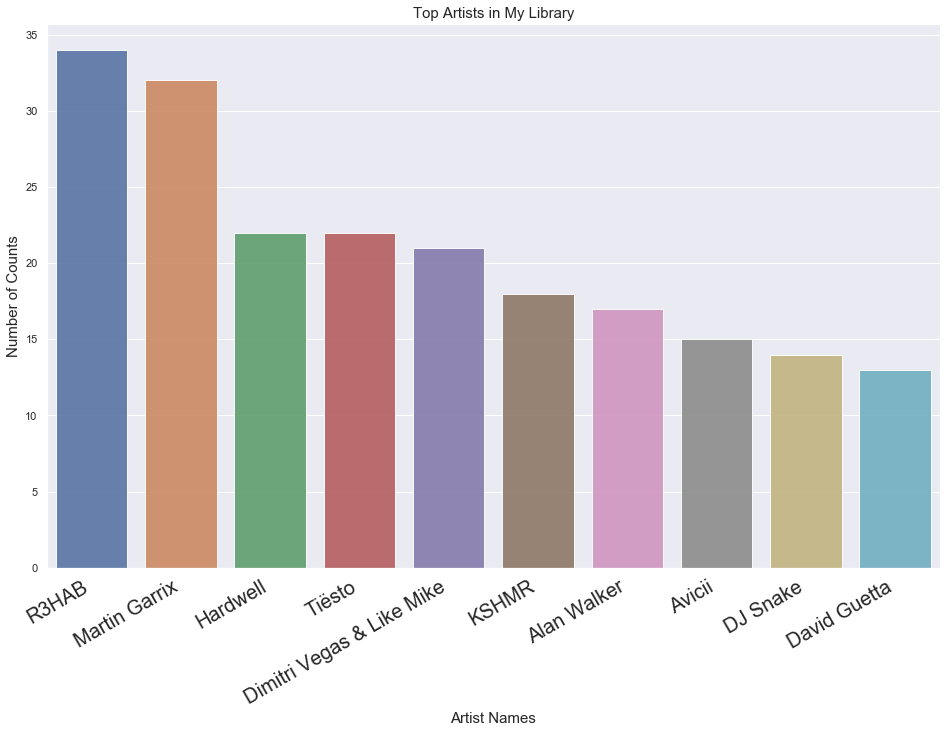

In [99]:
dj_count = df['Artist'].value_counts().head(10)
sns.set(style="darkgrid")
plt.figure(figsize = (16,10))
g = sns.barplot(dj_count.index, dj_count.values, alpha=0.9)
plt.xticks(rotation = 30, ha ='right', fontsize = 20)
plt.title('Top Artists in My Library', fontsize =15)
plt.ylabel('Number of Counts', fontsize=15)
plt.xlabel('Artist Names', fontsize=15)
plt.show()

<font size="3">Group by month and get my taste</font>

In [129]:
df['added_at']=pd.to_datetime(df['added_at'], errors = 'coerce')

In [134]:
df.index = df['added_at']
month_index = df.index.to_period('M')

/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [138]:
def agg(x):
    df_agg = x.groupby(by = [month_index])['danceability','energy','acousticness',
                'instrumentalness','speechiness','popularity'].aggregate('mean').reset_index()
    return df_agg

In [139]:
df_agg = agg(df)

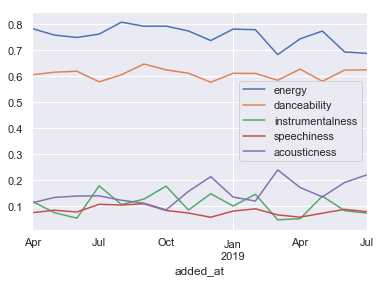

In [167]:
f, ax = plt.subplots(1)
df_agg.plot(kind = 'line', x='added_at', y='energy', ax = ax)
df_agg.plot(kind = 'line', x='added_at', y='danceability', ax = ax)
df_agg.plot(kind = 'line', x='added_at', y='instrumentalness', ax = ax)
df_agg.plot(kind = 'line', x='added_at', y='speechiness', ax = ax)
df_agg.plot(kind = 'line', x='added_at', y='acousticness', ax = ax)

<font size="3">Group by Artist and see</font>

In [319]:
def agg2(x):
    df_agg = x.groupby('Artist')['danceability','energy','acousticness',
                'instrumentalness','speechiness','popularity'].aggregate('mean').reset_index()
    return df_agg

In [320]:
df_agg2 = agg2(df)

In [321]:
top_dj = ['KSHMR', 'R3HAB', 'DJ Snake', 'Martin Garrix', 'Tiësto', 'W&W']

df_dj = df_agg2[df_agg2['Artist'].isin(top_dj)]

In [327]:
df_dj

,Artist,danceability,energy,acousticness,instrumentalness,speechiness,popularity
75,DJ Snake,0.636214,0.849357,0.081228,0.259879,0.094550,0.445714
171,KSHMR,0.540667,0.889000,0.028496,0.155476,0.130189,0.441667
215,Martin Garrix,0.580688,0.763719,0.079238,0.144410,0.064097,0.592500
250,R3HAB,0.612029,0.739794,0.140807,0.072046,0.083206,0.482059
307,Tiësto,0.632955,0.857955,0.018356,0.191686,0.084800,0.322727
322,W&W,0.552846,0.935154,0.024960,0.231331,0.127069,0.484615


In [326]:
df_dj['popularity'] = df_dj['popularity'] / 100

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


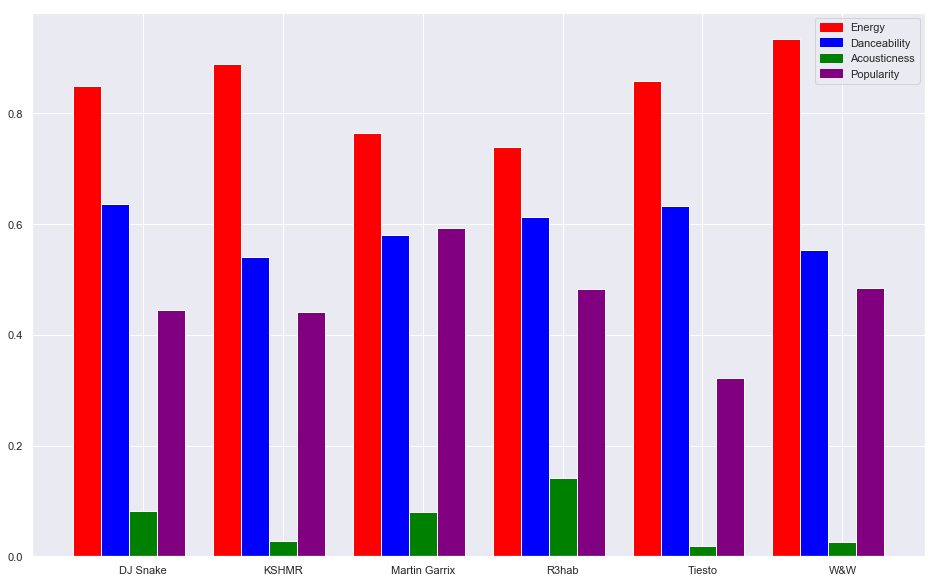

In [351]:
import numpy as np
import matplotlib.patches as mpatches

plt.figure(figsize = (16,10))

y1 = df_dj['energy']
y2 = df_dj['danceability']
y3 = df_dj['acousticness']
y4 = df_dj['popularity']
x = np.arange(len(y1))

width = 0.2
plt.bar(x, y1, width = width, color = 'red', zorder = 2)
plt.bar(x + width, y2, width = width, color = 'blue', zorder = 2)
plt.bar(x + width*2, y3, width = width, color = 'green', zorder = 2)
plt.bar(x + width*3, y4, width = width, color = 'purple', zorder = 2)

# labels
plt.xticks(x + width*2, ['DJ Snake', 'KSHMR', 'Martin Garrix', 'R3hab', 'Tiesto', 'W&W'])

# legend
red_patch = mpatches.Patch(color = 'red', label = 'Energy')
blue_patch = mpatches.Patch(color = 'blue', label = 'Danceability')
green_patch = mpatches.Patch(color = 'green', label = 'Acousticness')
purple_patch = mpatches.Patch(color = 'purple', label = 'Popularity')
plt.legend(handles = [red_patch, blue_patch, green_patch, purple_patch])

<font size="3">Correlation Heatmaps</font>

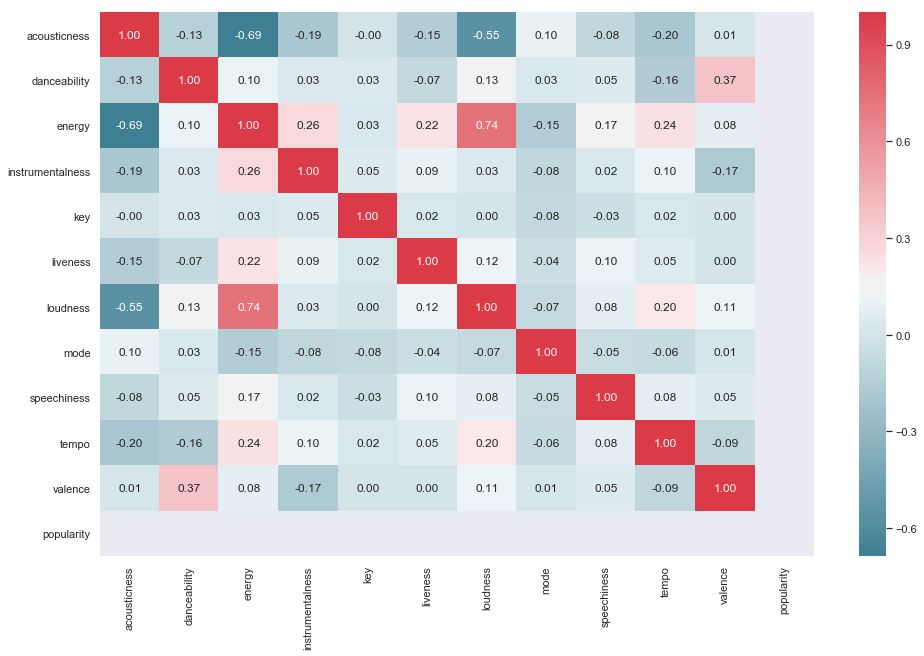

In [361]:
corr = df.corr()
plt.figure(figsize = (16,10))

colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

<font size="3">Clustering on song types</font>

<font size="3">K-means Clustering</font>

In [358]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [355]:
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
df_cluster = df[cluster_features]
X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

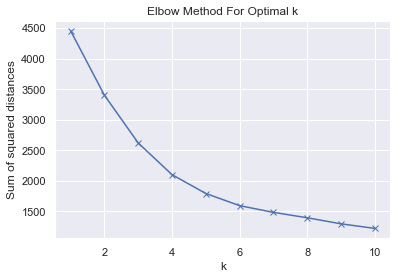

In [359]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# use k = 4 or k = 5

<font size="3">Principle Dimension Analysis (Linear)</font>

In [362]:
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [397]:
specific = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["Artist"] + " - " + df["song_title"]
text2 = text1.values


X = df[specific].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=12,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

# more red the dots, the more energenic and higher danceability it is 
# white dots are more lyrical it is, such as "may it be" 

In [402]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3'])

pca_df['pca1'] = X[:,0]
pca_df['pca2'] = X[:,1]
pca_df['pca3'] = X[:,2]

print('Variance explained per PC : {}'.format(pca.explained_variance_ratio_))

Variance explained per PC : [0.29319523 0.21159285 0.15276242]


In [411]:
chosen = ["energy", "liveness", "tempo", "valence"]
text1 = df["Artist"] + " - " + df["song_title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How hard is this to dance to?"},
        "yaxis": {"title": "How metal is this?"}
    }
}

py.iplot(fig, filename="test-graph2")

<font size="3">t-Distributed Stochastic Neighbor Embedding (Non-Linear)</font>

In [404]:
import time

chosen = ["energy", "liveness", "tempo", "valence", "loudness",
          "speechiness", "acousticness", "danceability", "instrumentalness"]

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 891 samples in 0.001s...
[t-SNE] Computed neighbors for 891 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 891 / 891
[t-SNE] Mean sigma: 0.148601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.836662
[t-SNE] KL divergence after 300 iterations: 1.095003
t-SNE done! Time elapsed: 1.9200429916381836 seconds
